In [57]:
# imports
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.regressionplots import abline_plot
from pandas import datetools
import numpy as np
import random
import seaborn as sns

In [44]:
df = pd.read_csv('/Users/francobonifetto/Documents/BTS/Data Science Foundations/Session_2 (Iliana)/2_titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.isnull().sum() #check if there is any data missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As we have missing values for Age, we need to replace the null values. Lets' see how

In [43]:
df['Age'].describe() #using this input, we will know how the data is.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [50]:
#Let's replace the missing values for random ones between the 1Q and 3Q

new_age_var = np.where(df["Age"].isnull(), # Logical check
                       random.randint(20,38),                       # Value if check is true
                       df["Age"])     # Value if check is false
df["New Age"] = new_age_var 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [51]:
X = df[["New Age", "Fare"]]
y = df["Survived"]

In [52]:
X = sm.add_constant(X) 
X.head()

,const,New Age,Fare
0,1.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,1.0,35.0,8.0500


In [60]:
model = sm.OLS(y, X).fit()

In [61]:
model.params

const      0.402531
New Age   -0.003470
Fare       0.002605
dtype: float64

In [54]:
predictions = model.predict(X) 
predictions

0      0.345076
1      0.456339
2      0.332954
3      0.419388
4      0.302051
5      0.323934
6      0.350237
7      0.450483
8      0.337841
9      0.432274
10     0.432148
11     0.270428
12     0.354099
13     0.348663
14     0.374409
15     0.253359
16     0.471450
17     0.335763
18     0.341846
19     0.320721
20     0.348803
21     0.318413
22     0.371395
23     0.397837
24     0.429663
25     0.352426
26     0.320721
27     1.021615
28     0.322425
29     0.322468
         ...   
861    0.359615
862    0.303510
863    0.483054
864    0.353112
865    0.290654
866    0.344938
867    0.426485
868    0.326647
869    0.417649
870    0.332878
871    0.376328
872    0.301046
873    0.262886
874    0.367884
875    0.369300
876    0.358777
877    0.357168
878    0.322468
879    0.424810
880    0.383502
881    0.308589
882    0.353584
883    0.332721
884    0.334145
885    0.343063
886    0.342703
887    0.414740
888    0.362981
889    0.390451
890    0.311679
Length: 891, dtype: floa

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     35.86
Date:                Wed, 08 Nov 2017   Prob (F-statistic):           1.05e-15
Time:                        20:01:13   Log-Likelihood:                -587.36
No. Observations:                 891   AIC:                             1181.
Df Residuals:                     888   BIC:                             1195.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4025      0.040     10.165      0.000       0.325       0.480
New Age       -0.0035      0.001     -2.860      0.004      -0.006      -0.001
Fare           0.0026      0.000      8.204      0.000       0.002       0.003
==============================================================================
Omnibus:                       31.284   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.166
Skew:                           0.479   Prob(JB):                     4.89e-27
Kurtosis:                       1.468   Cond. No.                         157.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#From what we can see from the summary, we can say that the correlation:
- Just to start with, the R-sqared is pretty far away of 1.
- As we can see from the pvalue, new Age although not being 0, it is still less than the confidence level: 0.05. This indicates that there is a statistically significant relationship between the term and the response and we find enough evidence to reject H0.
- The platykurtic kurtosis of 1.5 suggests that values are tight together and, combining this with the fact of having a constant adjusting to the model, this is why the model isn't good enough.

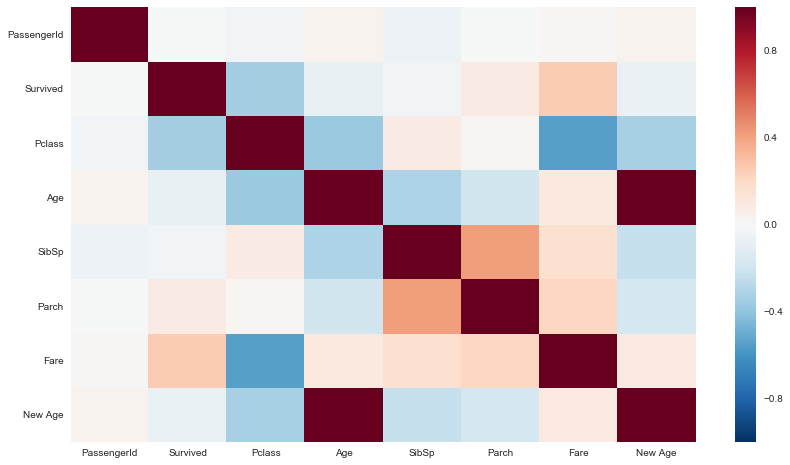

In [58]:
plt.figure(figsize=[14,8])
sns.heatmap(df.corr())

#### Contemplating the heatmap above, there is no visual correlation between a variable and survived. NEvertheless, teir might be a correlation with multiple variables but, as we see earlier (although fare is the more red one) Fare and Age is no good indicator of determing the survival.